In [1]:
"""
Politecnico di Torino - Laurea Triennale Ingegneria Energetica
Corso Energetica e Fonti Rinnovabili - Esercitazione Angoli Solari
"""
__author__ = "Daniele Salvatore Schiera"
__version__ = "A.A. 2023/2024 - Rev. 17/03/2024"
__email__ = "daniele.schiera@polito.it"

# Imports
# for interactivity:
%matplotlib widget 
# for printing pdf:
# %matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from pvlib import solarposition, location
from IPython.display import Markdown, Image, display, HTML, Latex, IFrame
import ipywidgets as wds
#plt.style.use('seaborn-whitegrid')

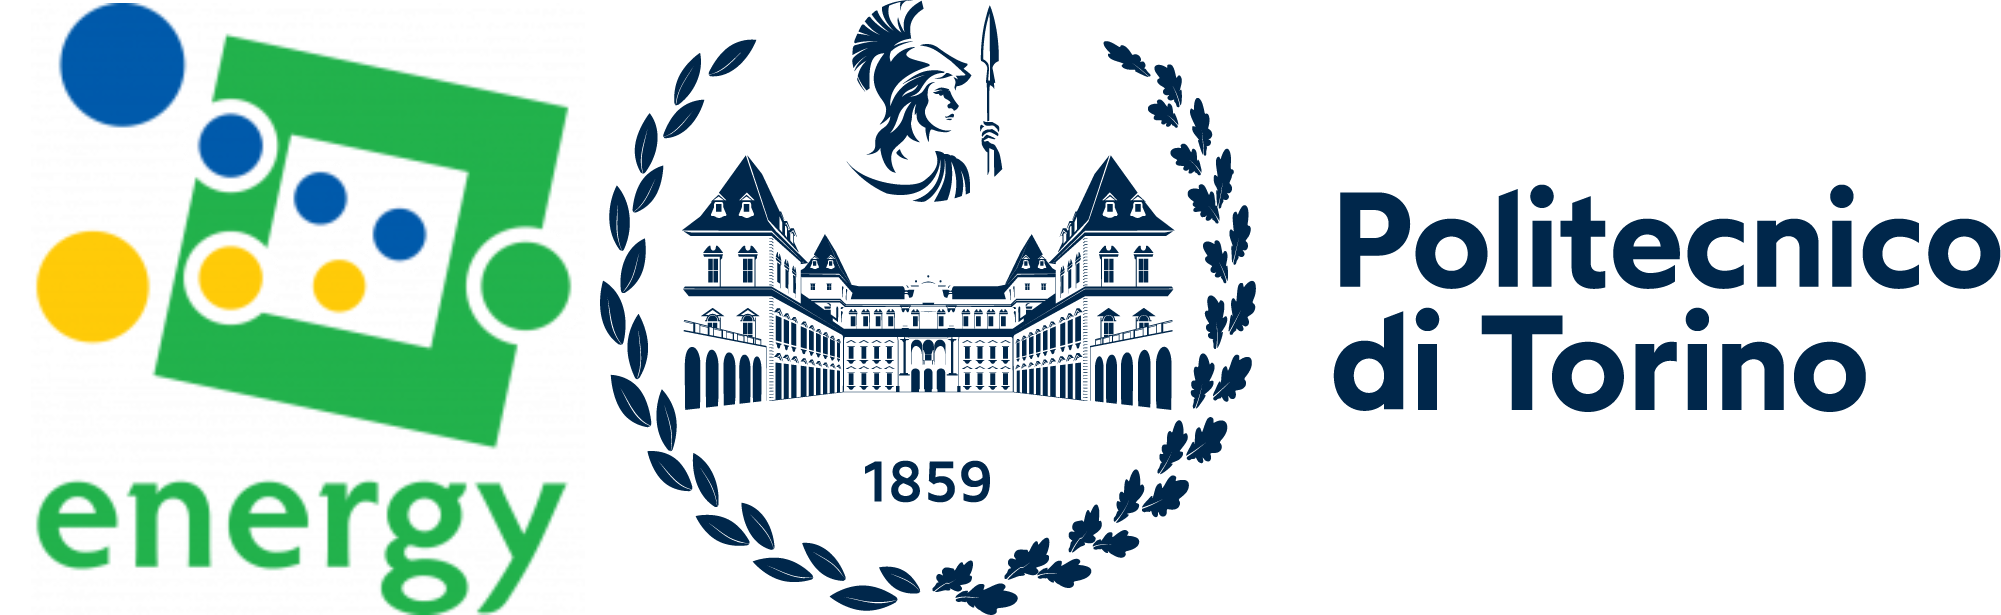

In [2]:
Image(filename="img/DENERG-Polito_Logo.png", width=400, embed=True)

## Energetica e Fonti Rinnovabili
### DENERG Politecnico di Torino
#### Daniele Salvatore Schiera, PhD
#### daniele.schiera@polito.it

----

# Esercitazione - Angoli solari

----

## Obiettivi di apprendimento
- Ricavare l’ora solare in uno specifico luogo del pianeta avendo a disposizione: l’ora del luogo, le sue coordinate (latitudine e longitudine, e longitudine del meridiano di riferimento) e il giorno dell’anno.
- Leggere una carta solare (o diagramma solare) per un dato luogo (per una certa latitudine) e a ricavare graficamente gli angoli solari azimut e altitudine solare essendo noti: il giorno dell’anno e l’ora solare. Ricavare graficamente le ore di alba e tramonto.
- Ricavare analiticamente gli angoli solari azimut e altitudine solare essendo noti: le coordinate del luogo (latitudine), il giorno dell’anno e l’ora solare. Confrontare i risultati analitici con quelli ottenuti dal diagramma solare.
- Calcolare analiticamente l’ora di alba e tramonto in un determinato luogo del pianeta in un giorno specifico avendo a disposizione: le coordinate del luogo e la data. Confrontare i risultati analitici con quelli ottenuti dal diagramma solare.

## Esercizi
1. Un osservatore si trova a Torino (Latitudine $L$ 45.00 N(+), longitudine $l$ 7.68 E(-)) il giorno **20 Marzo 2024**. Sapendo che il meridiano di riferimento per Torino è quello dell’Etna (longitudine standard $l_{st}$ 15.00 E(-)) e che l’orologio segna le ore **13:00**, calcolare l’ora solare corrispondente. **Nota bene: il 20 Marzo <u>non</u> è attiva l’ora legale!**
2. Viene fornito il diagramma solare di Torino (valido per la latitudine 45.00 N). Leggere tramite il diagramma quanto valgono gli angoli solari azimut e altitudine solare, ipotizzando che il giorno dell’anno sia lo stesso dell'esercizio (1) e che l’ora solare sia la medesima ricavata. Determinare anche l’ora di alba e tramonto per lo stesso giorno utilizzando il diagramma solare fornito. A partire dalle ore solari ottenute, ricavare le ore locali corrispondenti.

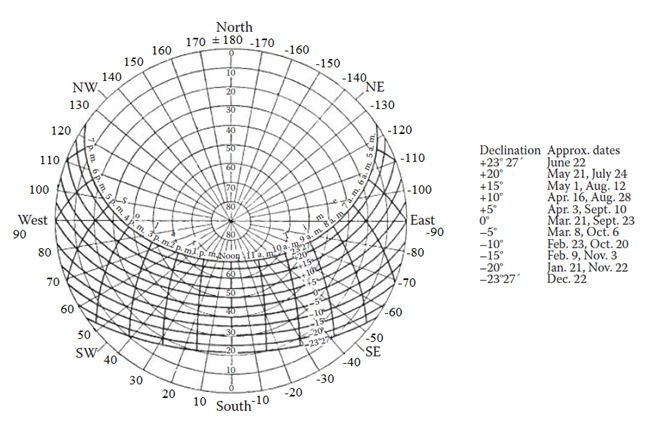

In [3]:
Image(filename="img/Sun_chart_45N.png",width=500)

3. Ricavare analiticamente gli angoli di azimut e altitudine solare visualizzati da un osservatore che si trova a Torino lo stesso giorno dell'esercizio (1) quando l’ora solare è quella ricavata nel medesimo. Confrontare i risultati ottenuti con quelli letti graficamente nell’esercizio (2). Nota: calcolare analiticamente tutti gli angoli solari fondamentali non forniti nel testo. Nota: utilizzando il diagramma solare fornito nell’esercizio (2), scegliere quale formula analitica utilizzare per il calcolo dell’azimut.
5. Calcolare analiticamente l’ora solare di alba e tramonto per lo stesso giorno dell'esercizio (1) a Torino. Confrontare gli orari ottenuti con quelli che si possono leggere dal diagramma solare ed ottenuti nell'esercizio (2).

In [4]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

# Esercizio 1
Un osservatore si trova a Torino (Latitudine $L$ 45.00 N(+), longitudine $l$ 7.68 E(-)) il giorno **20 Marzo 2024**. Sapendo che il meridiano di riferimento per Torino è quello dell’Etna (longitudine standard $l_{st}$ 15.00 E(-)) e che l’orologio segna le ore **13:00**, calcolare l’ora solare corrispondente. **Nota bene: il 20 Marzo <u>non</u> è attiva l’ora legale! (per il 2024, l'ora legale è attiva dal 31 Marzo al 27 ottobre).**

## Dati:

In [5]:
# Dati input
L = 45 # Lat [°]*
l_local = -7.68 # Long [°]
l_st = -15 # long standard [°]
data = pd.to_datetime('2024-03-20 13:00') # '2021-03-26 10:00'
col = 0 # 1 se ora legale, altrimenti 0. Per il 2022, l'ora legale è attiva dal 27 Marzo al 30 ottobre.
ora = data.hour+data.minute/60 # [h] in ore decimali
# Dati ricavati
n = data.dayofyear # Numero identificativo del giorno in esame rispetto l'anno 
# Output
Markdown(rf'$L = {L}^{{\circ}};\ l_{{local}} = {l_local}^{{\circ}};\ l_{{st}} = {l_st}^{{\circ}};\ ora = {ora} \ h;\  n = {n}$.')

$L = 45^{\circ};\ l_{local} = -7.68^{\circ};\ l_{st} = -15^{\circ};\ ora = 13.0 \ h;\  n = 80$.

## Procedimento
L'ora solare, o *Solar Time* ($ST$), in ogni luogo è riferita al tempo esatto in cui il sole attraversa il piano nord-sud equivalente al meridiano centrale del posto (cioè il mezzogiorno solare) dove raggiunge anche la culminazione (la massima elevazione, o altitudine). Il tempo solare differisce dall'ora di un comune orologio a causa del fuso orario del meridiano di riferimento e dall'equazione del tempo.  

Per calcolare l'ora solare si applica l'equazione seguente:
$$ST = LST + ET + (l_{st}-l_{local})\cdot4 \quad [min] \quad (1)$$

### *Local Standard Time*
$LST$ è il **Local Standard Time**, cioè l'ora locale riferita al fuso orario in cui si trova l'osservatore (tempo civile o l'ora di orologio). Il fuso orario è una porzione longitudinale della superficie terrestre compresa tra due determinati meridiani che adotta lo stesso orario per scopi legali, economici e sociali. A tale scopo si è divisa la superficie del globo in 24 fusi orari, ognuno limitato da due meridiani geografici distanti tra loro 15°, e si è stabilito che in ognuno di questi fusi tutti i paesi adottino il tempo solare medio corrispondente al meridiano centrale, cioè il tempo civile). La convenzione è stata adottata dalla maggioranza degli Stati, dove le linee di divisione tra un fuso e l’altro seguono, anziché le linee longitudinali, l’andamento dei confini delle singole nazioni. Il fuso orario è a sua volta riferito al tempo coordinato universale *UTC*, cioè il fuso orario scelto come riferimento globale (longitudine equivalente nella zona del Meridiano fondamentale di Greenwich), a partire dal quale sono calcolati tutti i fusi orari del mondo. [Qui](https://it.wikipedia.org/wiki/Fuso_orario#/media/File:World_Time_Zones_Map.png) trovate la mappa dei fusi orari.

In Italia si adotta il fuso orario *Central European Time CET* corrispondente a *UTC+1* e riferito al meridiano dell'Etna (-15°). Inoltre, durante il periodo estivo vige l'ora legale, dunque sarà necessario aggiungere un'ora al *CET* (si chiamerà *Central European Summer Time CEST*). 

In figura, la posizione dell'osservatore (in base alla latitudine e longitudine forniti) rispetto la terra:

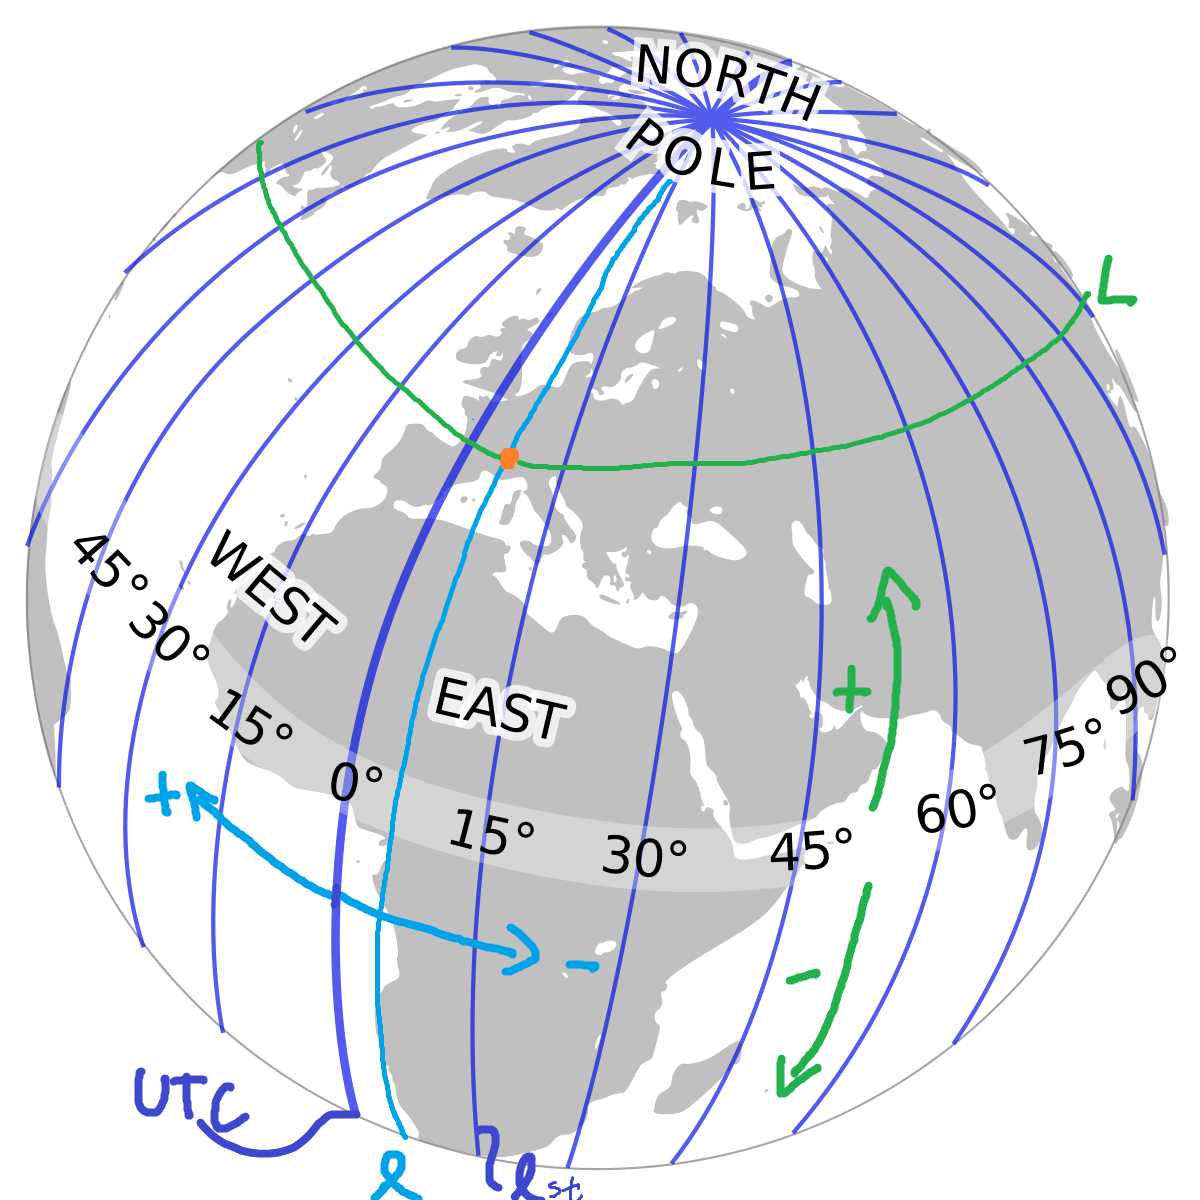

In [6]:
Image(filename="img/latitudineglobo45N.PNG", width=500)

Nel caso giorno in esame, è attiva l'ora legale, per cui:

In [7]:
LST = (ora - col)*60
Markdown(rf'$LST = ora - {col} = {ora-col} \ h = {round(LST,2)} \ min$.')

$LST = ora - 0 = 13.0 \ h = 780.0 \ min$.

### *Equazione del tempo*
L'**equazione del tempo** $ET$ è lo scostamento tra il tempo indicato da un orologio solare rispetto al suo scorrere regolare indicato da un orologio. Tale scostamento è la conseguenza dell'azione combinata tra l'inclinazione dell'asse rispetto all'eclittica (declinazione solare) e l'eccentricità dell'orbita della Terra attorno al Sole ([wiki](https://it.wikipedia.org/wiki/Equazione_del_tempo) per approfondire):

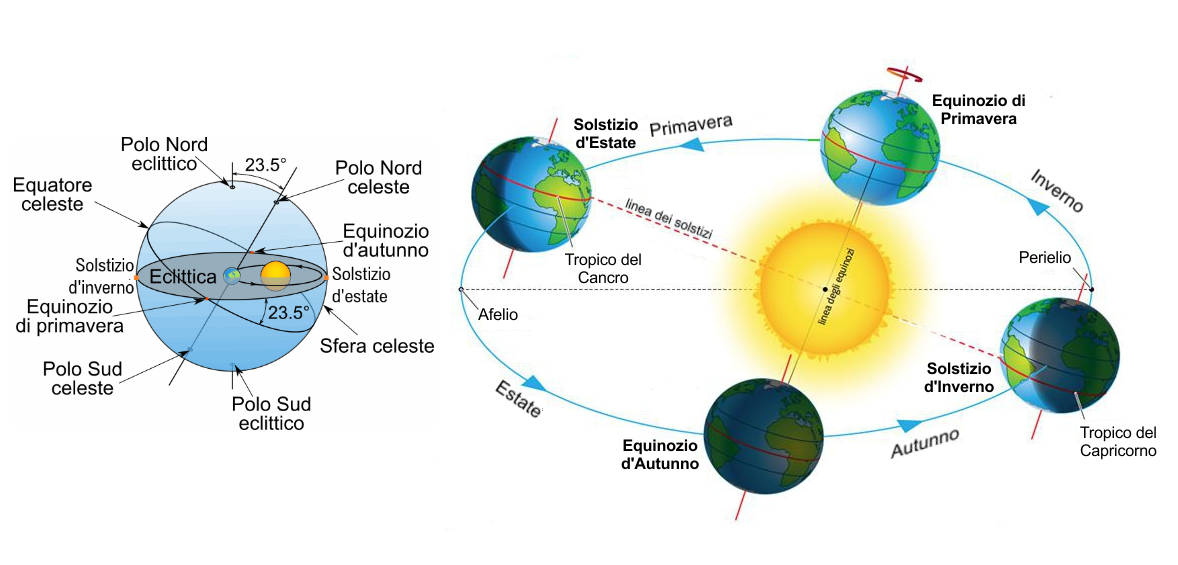

In [8]:
Image(filename="img/orbita_terra e eclittica.png")

>**Nota**: [Qui](https://www.geogebra.org/m/nwhgeqkz) un grafico interattivo del modello semplificato sole-terra.

In [9]:
settings = '/border/888888/rc/true/sdz/true/smb/false/stb/false/stbh/false/ld/false/sri/true/ctl/true/sfsb/true/szb/true'
IFrame('https://www.geogebra.org/material/iframe/id/nwhgeqkz'+settings, width=800, height=400)

L'equazione del tempo $ET$ si calcola con la seguente equazione empirica in funzione del numero del giorno $n$:

$$\begin{align*}
ET &= 9.87\sin 2B -7.53\cos B -1.5\sin B  \quad [min] \quad (2)\\
\text{dove:}\\
B &= \frac{360(n-81)}{364} \quad [^{{\circ}}] \quad (3)\\
\end{align*}$$

> **Attenzione**: B è espresso in gradi, quindi gli argomenti delle funzioni seno e coseno sono in gradi!

Di seguito il grafico di $ET$ in funzione del giorno $n$:

In [10]:
# ET function
nx = np.array([x for x in range(1,366)])
Bx = (360*(nx-81)/364)*np.pi/180
ETy = 9.87*np.sin(2*Bx)-7.53*np.cos(Bx)-1.5*np.sin(Bx)
ETyl = solarposition.equation_of_time_pvcdrom(nx)
# ET for n
B = 360*(n-81)/364
B_rad = B*np.pi/180
ET = 9.87*np.sin(2*B_rad)-7.53*np.cos(B_rad)-1.5*np.sin(B_rad)
# plotting
fig, ax = plt.subplots(1,1,figsize=(10, 4))
fig.canvas.header_visible = False
ax.plot(nx,ETyl,c='r',linestyle='-',label='ET pvlib')
ax.plot(nx,ETy,c='g',label='ET calcolato')
ax.plot(n,ET,'ro',label=f'ET a {n}')
ax.set_title('Equazione del Tempo')
ax.set_xlabel('n')
ax.set_ylabel('ET [min]')
plt.legend()
ax.grid('on')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Nel giorno in esame, usando le equazioni (2) e (3) otteniamo:

In [36]:
Markdown(rf'$B = {round(B,3)}^{{\circ}}={round(B_rad,5)} \ rad \implies  ET = {round(ET,2)} \ min$.')

$B = -0.989^{\circ}=-0.01726 \ rad \implies  ET = -7.84 \ min$.

### *Correzione longitudinale*
L'ultimo argomento dell'equazione (1) è la **correzione longitudinale**, necessaria per tenere conto della diversa longitudine dell'osservatore rispetto al meridiano standard, e dove il fattore $4$ sono $min/^{\circ}$, corrispondente a $60 \ min$ ogni $15^{\circ}$ (il tempo che impiega la terra a ruotare rispetto la distanza di due meridiani consecutivi). Applicando la correzione otteniamo:

In [12]:
corr_long = (l_st - l_local)*4
Markdown(rf'$(l_{{st}}-l_{{local}})\cdot4 = {round(corr_long,2)} \ min$.')

$(l_{st}-l_{local})\cdot4 = -29.28 \ min$.

Infine, calcolati tutti i termini dell'equazione (1) e facendo attenzione a riportarli tutti in minuti, possiamo calcolare l'ora solare $ST$:

In [13]:
ST = LST + ET + corr_long # minuti
ST_h = ST/60 # ore decimali
ST_hour = math.modf(ST_h)[1]
ST_min = np.round(math.modf(ST_h)[0]*60)
diff = LST - ST
diff_h = diff/60
diff_hour = math.modf(diff_h)[1]
diff_min = np.round(math.modf(diff_h)[0]*60) #np.ceil((diff_h-diff_hour)*60)
Markdown(rf'$ST = {round(ST,2)} \min$ => ${round(ST/60,2)} \ h$ => ${int(ST_hour):02d}{{:}}{int(ST_min):02d}$.')

$ST = 742.88 \min$ => $12.38 \ h$ => $12{:}23$.

In [14]:
Markdown(rf'Dai risultati, si può notare come l\'ora locale $LST$ differisce dall\'ora solare $ST$ di ben ${int(diff_hour):02d}{{:}}{int(diff_min):02d}={round(diff_hour*60+diff_min,2)} \min$.')

Dai risultati, si può notare come l\'ora locale $LST$ differisce dall\'ora solare $ST$ di ben $00{:}37=37.0 \min$.

> **Nota**: Una rappresentazione visiva dell'effetto dell'equazione del tempo e della declinazione terrestre è l'analemma, cioè una particolare curva geometrica a forma di otto che descrive la posizione del Sole nei diversi giorni dell'anno, alla stessa ora e nella località o meridiano dell'osservatore ([qui](https://www.geogebra.org/m/vd3qpad8) un esempio di Analemma interattivo e [qui](https://starwalk.space/it/news/analemma-definition) per approfondire).

In [15]:
IFrame('https://www.geogebra.org/material/iframe/id/vd3qpad8'+settings, width=1000, height=1100)

# Esercizio 2
Viene fornito il diagramma solare di Torino (valido per la latitudine 45.00 N). Leggere tramite il diagramma quanto valgono gli angoli solari azimut e altitudine solare, ipotizzando che il giorno dell’anno sia lo stesso dell'esercizio (1) e che l’ora solare sia la medesima ricavata. Determinare anche l’ora di alba e tramonto per lo stesso giorno utilizzando il diagramma solare fornito. A partire dalle ore solari ottenute, ricavare le ore locali corrispondenti.

## Procedimento

L'esercizio viene risolto utilizzando i risultati dell'esercizio precedente ed il diagramma solare fornito durante l'esercitazione (valido per Latitudine 45° N):

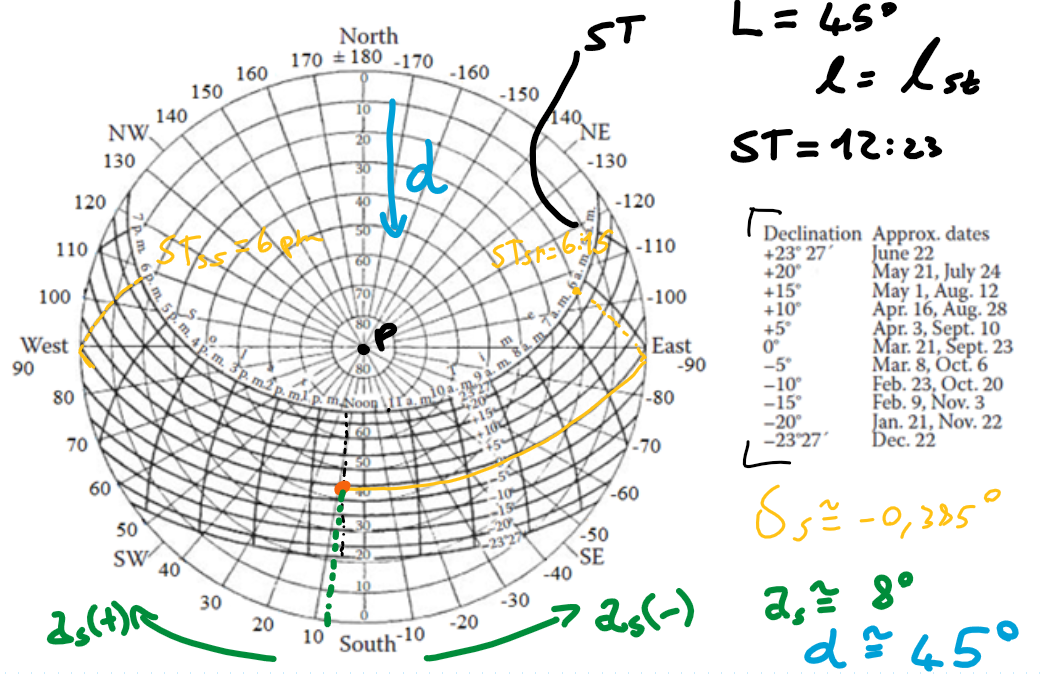

In [16]:
Image(filename="img/Sun_chart_45N_sol.png")

Dall'analisi del diagramma otteniamo i seguenti risultati:

- Declinazione $\delta_s \simeq -0.385^{{\circ}}$ (per interpolazione lineare tra Mar. 8 -5° e Mar. 21 0°)
- Azimuth solare $a_s \simeq 8^{{\circ}}$
- Altitudine solare $\alpha \simeq 45^{{\circ}}$
- Alba $ST_{sr} \simeq$ 06:15 => $LST_{sr} \simeq$ 06:52
- Tramonto $ST_{ss} \simeq$ = 18:00 => $LST_{ss} \simeq$ 18:37

# Esercizio 3
Ricavare analiticamente gli angoli di azimut e altitudine solare visualizzati da un osservatore che si trova a Torino lo stesso giorno dell'esercizio (1) quando l’ora solare è quella ricavata nel medesimo. Confrontare i risultati ottenuti con quelli letti graficamente nell’esercizio (2). Nota: calcolare analiticamente tutti gli angoli solari fondamentali non forniti nel testo. Nota: utilizzando il diagramma solare fornito nell’esercizio (2), scegliere quale formula analitica utilizzare per il calcolo dell’azimut.

## Procedimento

Per calcolare analiticamente gli angoli solari *azimuth* $a_s$ e *altitudine solare* $\alpha$ (o il complementare *zenith* $\theta$) è necessario conoscere le relazioni trigonometriche che legano i suddetti angoli solari (riferimento sole-osservatore) con gli angoli solari fondamentali (riferimento sole-terra): *latitudine* $L$, *declinazione* $\delta_s$ e *angolo orario* $h_s$. Di seguito un'illustrazione degli angoli solari:

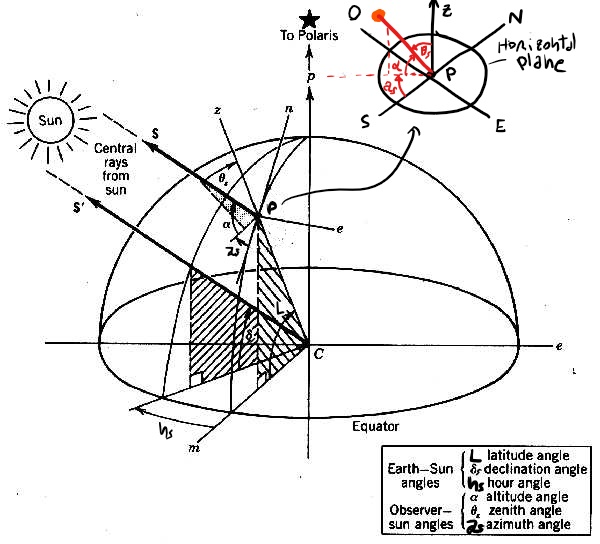

In [17]:
Image(filename="img/angoli_solari.jpg")

### *Angoli solari riferimento sole-terra*
La **latitudine** $L$ definisce la posizione dell'osservatore rispetto all'equatore. 

La **declinazione solare**  $\delta_s$ è l'angolo tra la linea dei raggi solari, cioè il piano eclittico, e il piano passante per l'equatore. Come visto a lezione, è un angolo compreso tra -23.45° (sud equatore) e +23.45° (nord equatore). Infatti, la declinazione è una conseguenza dell'inclinazione dell'asse terrestre e della sua orbita attorno al Sole. Di seguito una rappresentazione della declinazione solare:

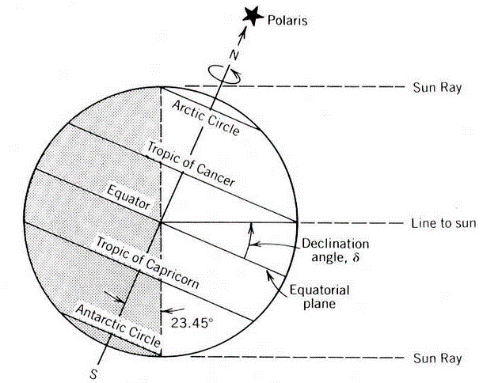

In [18]:
Image(filename='img/Solar-declination.png')

>**Nota**: [Qui](https://www.geogebra.org/m/BJxyY5Vz) un grafico interattivo della radiazione solare verso la terra in base alla declinazione e alla posizione dell'osservatore.

In [19]:
IFrame('https://www.geogebra.org/material/iframe/id/BJxyY5Vz'+settings, width=800, height=450)

La declinazione $\delta_s$ può essere calcolata in funzione del giorno dell'anno $n$, secondo l'equazione (formula di Cooper):
$$\delta_s = 23.45^{{\circ}}\sin\left( \frac{360^{{\circ}}(284+n)}{365} \right) \quad [^{{\circ}}]$$

> **Attenzione**: l'argomento del seno è espresso in gradi! $360^{{\circ}}= 2\pi \ rad$.

Di seguito il grafico di $\delta_s$ in funzione di $n$:

In [20]:
# declination function
deltay = 23.45*np.sin(np.radians(360/365*(284+nx)))

# declinazione esercizio
declination = solarposition.declination_cooper69(n) * 180 / np.pi # gradi, stessa formula usata a lezione

fig1, ax1 = plt.subplots(1,1,figsize=(10, 4))
fig1.canvas.header_visible = False
ax1.plot(nx,deltay, c='red')
ax1.plot(n,declination,'ro')
ax1.set_title('Declinazione')
ax1.set_xlabel('n')
ax1.set_ylabel(r'$\delta_s$ [°]')
ax1.grid('on')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
Markdown(rf'Al giorno $n={n}$ la declinazione solare risulta $\delta_s={round(declination,3)}^{{\circ}}$.')

Al giorno $n=80$ la declinazione solare risulta $\delta_s=-0.404^{\circ}$.

L'**angolo orario** $h_s$ esprime in gradi la distanza oraria (in ore decimali o minuti) tra l'ora solare $ST$ ed il mezzogiorno solare vero 12:00 (cioè l'ora solare in cui il sole si trova nel piano nord-sud, o meridiano, e raggiunge la culminazione):
$$h_s = 15[^{{\circ}}/h]\cdot(ST[h]-12)=\frac{ST[min]-12\cdot60}{4[min/^{{\circ}}]} \quad [^{{\circ}}] \quad (3)$$


In [22]:
h_s = (ST_h-12)*15
Markdown(rf'L\'ora solare calcolata nell\'esercizio (1) è $ST={round(ST_h,2)} \ h$, equivalente ad un angolo orario solare $h_s = {round(h_s,2)}^{{\circ}}$.')        

L\'ora solare calcolata nell\'esercizio (1) è $ST=12.38 \ h$, equivalente ad un angolo orario solare $h_s = 5.72^{\circ}$.

### *Angoli solari riferimento sole-osservatore*
L'**altitudine solare** $\alpha$ è l'angolo verticale tra una linea collineare con i raggi del sole e il piano orizzontale dell'osservatore, e si calcola attraverso la seguente relazione trigonometrica:
$$\sin \alpha=\sin L \sin \delta_s + \cos L \cos \delta_s \cos h_s \quad (4)$$

>**Nota**: l'angolo complementare a 90° dell'altitudine solare $\alpha$ è l'**angolo solare di zenith** $\theta$ (o semplicemente $z$), cioè l’angolo tra linea del sole e la linea verticale all'osservatore (chiamato appunto zenith), corrispondente alla perpendicolare al piano orizzontale. Dunque $z=90^{{\circ}}-\alpha$, e per le proprietà trigonometriche vale $\cos \alpha = \cos(90^{{\circ}}-z) = \sin z$.

In [23]:
alpha = np.arcsin(np.sin(np.radians(L))*np.sin(np.radians(declination))+np.cos(np.radians(L))*np.cos(np.radians(declination))*np.cos(np.radians(h_s)))
Markdown(rf'Risolvendo si ottiene $\\alpha = {round(alpha,4)}\ rad={round(alpha*180/np.pi,2)}^{{\circ}}$.')

Risolvendo si ottiene $\\alpha = 0.7734\ rad=44.31^{\circ}$.

L'**azimuth solare** $a_s$ è l'angolo tra la linea Sud e la proiezione sul piano orizzontale della linea che idealmente congiunge l'osservatore e il Sole, e si calcola attraverso la seguente relazione trigonometrica:
$$\sin a_s  = \frac{\cos \delta_s \sin h_s}{\cos \alpha } \quad (5)$$

>**Attenzione**: valida solo se $|a_s|<90^{{\circ}}$.

Per capire se $|a_s|>90^{{\circ}}$ possiamo utilizzare il diagramma solare e visivamente individuare le zone del traggitto del sole in cui si troverà verso Nord, oltre la linea est-ovest. Possiamo notare dal diagramma solare che il sole si trova verso Sud e dunque ci troviamo sicuramente nella condizione $|a_s|<90^{{\circ}}$.

In alternativa, se $|L|>|\delta_s|$ possiamo calcolare analiticamente il valore assoluto dell'angolo orario $h_{s,ew}$ in cui il sole intercetta il piano est-ovest, cioè nel momento in cui l'azimuth solare $a_s$ è pari a +90° o -90° (il sole si troverà nella linea est/ovest). Dunque, imponendo $a_s=90^{{\circ}}$ e risolvendo il sistema di equazioni (4) e (5) per l'angolo orario $h_{s,ew}$ otteniamo:
$$a_s = 90^{{\circ}} \implies h_{s,ew} = \cos^{-1}\left(\cot L \tan \delta_s \right) \quad [rad]$$
Se risulta $|h_s|<h_{s,ew}$ allora siamo certi che $|a_s|<90^{{\circ}}$.

Se invece ci troviamo ai tropici e $|L|\leq|\delta_s|$, il sole rimarrà sempre a Nord (Sud nell'emisfero Sud) rispetto la linea est/ovest ed il valore di $a_s$ sarà sempre maggiore (minore) di 90°, dunque l'espressione per il calcolo di $h_{s,ew}$ non è più valida.

Quando $|a_s|>90^{{\circ}}$ si dovrà utilizzare la formula corretta vista a lezione (riportata nella sezione Extra per comodità).

In [24]:
h_sew = np.arccos(np.tan(np.radians(declination))/np.tan(np.radians(L)))*180/np.pi
Markdown(rf'Nel nostro caso $h_{{s,ew}}={round(h_sew,2)}^{{\circ}}>|h_s| \implies |a_s|<90^{{\circ}}$.')

Nel nostro caso $h_{s,ew}=90.4^{\circ}>|h_s| \implies |a_s|<90^{\circ}$.

In [25]:
a_s0 = np.arcsin(np.cos(np.radians(declination))*np.sin(np.radians(h_s))/np.cos(alpha))
Markdown(rf'Dunque, utilizzando la formula (5) e risolvendo otteniamo $a_s={round(a_s0,4)}\ rad= {round(a_s0*180/np.pi,2)}^{{\circ}}$.')

Dunque, utilizzando la formula (5) e risolvendo otteniamo $a_s=0.1397\ rad= 8.01^{\circ}$.

# Esercizio 4
Calcolare analiticamente l’ora solare di alba e tramonto per lo stesso giorno dell'esercizio (1) a Torino. Confrontare gli orari ottenuti con quelli che si possono leggere dal diagramma solare ed ottenuti nell'esercizio (2).

## Procedimento
Per il calcolo dell'ora solare di alba e tramonto basterà utilizzare la formula (4) trovando l'angolo orario ed imporre $\alpha=0^\circ$, cioè quando il sole si trova nel piano orizzontale dell'osservatore:
$$\alpha=0° \implies h_{ss} \ \text{or} \ h_{sr} = \pm \cos^{-1}\left ( -\tan L \tan \delta_s \right ) \quad [rad]$$

In [26]:
hss = np.arccos(-np.tan(np.radians(L))*np.tan(np.radians(declination)))*180/np.pi
hsr = -np.arccos(-np.tan(np.radians(L))*np.tan(np.radians(declination)))*180/np.pi
Markdown(rf'Otteniamo $h_{{ss}}={round(hss,2)}^{{\circ}}$ e $h_{{sr}}={round(hsr,2)}^{{\circ}}$.')

Otteniamo $h_{ss}=89.6^{\circ}$ e $h_{sr}=-89.6^{\circ}$.

>**Nota**: La relazione per il calcolo degli angoli orari di alba e tramonto considera il centro del cerchio solare sull'orizzonte. In altre parole, alba e tramonto sono definiti come i momenti in cui l'arco superiore del sole si trova nell'orizzonte. 

In [27]:
STss = hss/15+12
STsr =hsr/15+12
Markdown(rf'Per il calcolo delle ore solari corrispondenti basterà applicare la formula (3). Dunque avremo $ST_{{ss}}={round(STss,2)}\ h$ e $ST_{{sr}}={round(STsr,2)}\ h$.')

Per il calcolo delle ore solari corrispondenti basterà applicare la formula (3). Dunque avremo $ST_{ss}=17.97\ h$ e $ST_{sr}=6.03\ h$.

In [28]:
STss_h = STss
STss_hour = math.modf(STss_h)[1]
STss_min = np.round(math.modf(STss_h)[0]*60)
STsr_h = STsr
STsr_hour = math.modf(STsr_h)[1]
STsr_min = np.round(math.modf(STsr_h)[0]*60)
Markdown(rf'Convertendo in HH:MM otteniamo $ST_{{ss}}={int(STss_hour):02d}{{:}}{int(STss_min):02d}$ e $ST_{{sr}}={int(STsr_hour):02d}{{:}}{int(STsr_min):02d}$.')

Convertendo in HH:MM otteniamo $ST_{ss}=17{:}58$ e $ST_{sr}=06{:}02$.

In [29]:
LSTss = STss_h*60 - ET - corr_long
LSTss_h = LSTss/60
LSTss_hour = math.modf(LSTss_h)[1]
LSTss_min = np.round(math.modf(LSTss_h)[0]*60)
LSTsr = STsr_h*60 - ET - corr_long
LSTsr_h = LSTsr/60
LSTsr_hour = math.modf(LSTsr_h)[1]
LSTsr_min = np.round(math.modf(LSTsr_h)[0]*60)
Markdown(rf'Infine, utilizzando l\'equazione (1) possiamo ottenere l\'ora locale di alba e tramondo: $LST_{{ss}}={int(LSTss_hour):02d}{{:}}{int(LSTss_min):02d}$ e $LST_{{sr}}={int(LSTsr_hour):02d}{{:}}{int(LSTsr_min):02d}$.')

Infine, utilizzando l\'equazione (1) possiamo ottenere l\'ora locale di alba e tramondo: $LST_{ss}=18{:}36$ e $LST_{sr}=06{:}39$.

# Confronto metodo grafico Esercizio 2 con metodo analitico Esercizi 3/4

|  | Metodo analitico | Metodo Grafico |
| :- | :-: | :-: |
| $\delta_s$ | -0.404° | -0.385° |
| $\alpha$ | 44.31° | 45° |
| $a_s$ | 8.01° | 8° |
| $ST_{ss}$ | 18:00 | 17:58 |
| $ST_{sr}$ | 06:15 | 06:02 |

# Extra
## Carta solare con Python

E' possibile ricostruire il diagramma solare utilizzando librerie specifiche in Python, e.g. *pvlib*. Di seguito un elaborazione del diagramma per la località e la data scelta in input. Il diagramma solare potrebbe differire leggermente da quello visto a lezione a causa di un diverso sistema di riferimento. In questo caso si nota che: i) il raggio rappresenta lo zenith piuttosto che l'altezza solare; ii) il diagramma è riferito all'orario locale $LST$ (civile, escludendo l'ora legale) e per tale ragione sono presenti gli analemmi, necessari per tenere conto dell'ora solare e dunque della reale posizione del sole. Fissata l'ora $LST$, la colorbar ci aiuta ad identificare in quale punto dell'analemma ci troviamo in base al giorno dell'anno, quindi identificando esattamente la declinazione, lo zenith e l'azimuth solare.

In [30]:
# Sun path diagram per una determinata località
# Per semplicità, utilizzare l'ora locale (non considerando l'ora legale) senza definire la time zone (anche se siamo sempre in CET UTC+1 e CEST UTC+2 nel caso in esame)
year = data.year
# range di un anno
#times = pd.date_range(f'{year}-01-01 00:00:00', f'{year+1}-01-01', closed='left', freq='H', tz='UTC')
times = pd.date_range(f'{year}-01-01 00:00:00', f'{year+1}-01-01', inclusive='left', freq='h', tz='UTC') # pandas 1.14
# calcolo posizione solare
solpos = solarposition.get_solarposition(times, L, l_local, method='ephemeris') # lo converte sempre in UTC
# rimuovi la notte
solpos = solpos.loc[solpos['elevation'] > 0, :]

# Sun path
fig1 = plt.figure(figsize=(10,6))
fig1.canvas.header_visible = False
ax1 = plt.subplot(1, 1, 1, projection='polar')
# cambio del riferimento della coordinata theta
corr = -180
# Disegno analemmi
points = ax1.scatter(np.radians(solpos.azimuth + corr), solpos.zenith,s=2, label=None, c=solpos.index.dayofyear)
ax1.figure.colorbar(points,label='n - day of the year')

# Disegno labels delle ore
for hour in np.unique(solpos.index.hour):
    # choose label position by the smallest radius for each hour
    subset = solpos.loc[solpos.index.hour == hour, :]
    r = subset.zenith
    pos = solpos.loc[r.idxmin(), :]
    ax1.text(np.radians(pos['azimuth'] + corr), pos['zenith'], str(hour))
    
# Disengno sun path particolari (soltizi ed equinozi)
# Info 2021: Solstizio 21 giugno 03:32 Solstizio 21 dicembre 15:59 Equinozio 20 marzo 09:37 Equinozio 22 settembre 19:21
days = {'2020-06-21':23.45, '2020-03-20':0, '2020-12-21':-23.45}
for date in pd.to_datetime(list(days.keys())):
    times = pd.date_range(date, date + pd.Timedelta('24h'), freq='5min', tz='UTC')
    solpos = solarposition.get_solarposition(times, L, l_local)
    solpos = solpos.loc[solpos['elevation'] > 0, :]
    label = date.strftime('%m-%d')
    d = date.strftime('%Y-%m-%d')
    ax1.plot(np.radians(solpos.azimuth + corr), solpos.zenith, label=label+rf' $\delta_s \simeq$ {days[d]}°')

ax1.figure.legend(loc='upper left')

ax1.set_title(f'Sun path diagram. LAT {L}° LON {l_local}°')
# cambio coordinate
theta_labels = list(np.linspace(0,180,18,endpoint=False,dtype='int'))+list(np.linspace(-180,0,18,endpoint=False,dtype='int'))
theta_labels = [f'{str(elem)}°' for elem in theta_labels]
ax1.set_theta_zero_location('S')
ax1.set_theta_direction(-1)
ax1.set_rmax(90)
ax1.set_rlabel_position(140)
ax1.set_thetagrids(np.linspace(0,360,36, endpoint=False),labels=theta_labels)
ax1.figure.text(0.535, 0.025, '$a_s$', fontsize=12,
        verticalalignment='top')
ax1.figure.text(0.42, 0.83, r'$\theta$', fontsize=12,
        verticalalignment='top')
fig1.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Nel seguente diagramma si evidenzia la posizione del sole nel giorno e nell'ora considerata, con l'indicazione dell'ora di alba e tramonto. 

In [31]:
# Posizione sole nel caso studio
time = data-pd.Timedelta(hours=col) # per correggere ora legale

ETl = pd.to_timedelta(np.array(solarposition.equation_of_time_pvcdrom(n)), unit='minutes')
solar_timel = time + ETl + pd.Timedelta(minutes=(l_st - l_local) * 4) # da verificare UTC

pos = solarposition.get_solarposition(time, L, l_local, method='ephemeris')
# azimuthl = pos.azimuth[0]
# zenithl = pos.zenith[0]
azimuthl = pos.azimuth.iloc[0]
zenithl = pos.zenith.iloc[0]
# print(pos.iloc[0])
# print(ET.total_seconds() / 60)
# print(solar_time)

fig2 = plt.figure(figsize=(10,6))
fig2.canvas.header_visible = False
ax2 = plt.subplot(1, 1, 1, projection='polar')
# cambio del riferimento della coordinata theta per il grafico
corr = -180
# Analemma per l'ora in esame 
times = pd.date_range(time,time +pd.Timedelta(days=364),freq='D', tz='UTC')
solpos = solarposition.get_solarposition(times, L, l_local, method='ephemeris')  # lo converte in UTC
# remove nighttime
solpos = solpos.loc[solpos['elevation'] > 0, :]
points = ax2.scatter(np.radians(solpos.azimuth + corr), solpos.zenith, s=2, label=None,c=np.unique(solpos.index.dayofyear))
ax2.figure.colorbar(points, label = f'n = {n}')
# Posizione sole
ax2.scatter(np.radians(pos.azimuth + corr),pos.zenith, s=40, label=None, c='red')
# Ora posizione
r = solpos.zenith
postext = solpos.loc[r.idxmin(), :]
ax2.text(np.radians(postext['azimuth'] + corr), postext['zenith'], time.strftime('%H:%M'))
# Disengno sun path particolari (soltizi ed equinozi)
color = {'2020-06-21':'tab:blue', '2020-03-20':'tab:orange', '2020-12-21':'tab:green',time.strftime('%Y-%m-%d'):'tab:red'}
days = {'2020-06-21':23.45, '2020-03-20':0, '2020-12-21':-23.45,time.strftime('%Y-%m-%d'):round(declination,2)}
for date in pd.to_datetime(list(days.keys())):
    times = pd.date_range(date, date + pd.Timedelta('24h'), freq='1min', tz='UTC')
    solpos = solarposition.get_solarposition(times, L, l_local)
    solpos = solpos.loc[solpos['elevation'] >= 0, :]
    label = date.strftime('%m-%d')
    d = date.strftime('%Y-%m-%d')
    ax2.plot(np.radians(solpos.azimuth + corr), solpos.zenith, label=label+rf' $\delta_s \simeq$ {days[d]}°',c=color[d])

sun_rise_set_transit = solarposition.sun_rise_set_transit_ephem(times,L,l_local).iloc[0]
sunrise = sun_rise_set_transit['sunrise']
sunset = sun_rise_set_transit['sunset']

postext = solpos.iloc[0]
ax2.text(np.radians(postext['azimuth'] + corr)-0.05, postext['zenith'], sunrise.strftime('%H:%M'))
ax2.scatter(np.radians(postext.azimuth + corr),postext.zenith, s=40, label=None, c='red')
postext = solpos.iloc[-1]
ax2.text(np.radians(postext['azimuth'] + corr)-0.05, postext['zenith']-5, sunset.strftime('%H:%M'))
ax2.scatter(np.radians(postext.azimuth + corr),postext.zenith, s=40, label=None, c='red')
ax2.figure.legend(loc='upper left')

textstr = '\n'.join((f'Date {time.date()} LST {time.time()}',
    r'$Azimuth \ a_s=%.2f °$' % (-180+azimuthl, ),
    r'$Altitude \ \alpha=%.2f ° \ (zenith \ \theta=%.2f °)$' % (90-zenithl,zenithl, )))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax2.figure.text(0.01, 0.15, textstr, fontsize=12,
        verticalalignment='top', bbox=props)

ax2.set_title(f'Sun path diagram. LAT {L}° LON {l_local}°')
# cambio coordinate
ax2.set_theta_zero_location('S')
ax2.set_theta_direction(-1)
ax2.set_rmax(90)
ax2.set_rlabel_position(140)
ax2.set_thetagrids(np.linspace(0,360,36, endpoint=False),labels=theta_labels)
ax2.figure.text(0.535, 0.025, '$a_s$', fontsize=12,
        verticalalignment='top')
ax2.figure.text(0.42, 0.83, r'$\theta$', fontsize=12,
        verticalalignment='top')
fig2.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Confronto risultati libreria Python con risultati ottenuti in classe:

In [32]:
print('pvlib:')
print(pos.loc[time])
print()
print('Ora solare calcolata:', round(ST_h,2), 'h')
print('Equazione del tempo libreria:',round(ETl.total_seconds()/60,2),'min')
print('Equazione del tempo calcolata:',round(ET,2),'min')
cooper = solarposition.declination_cooper69(n) * 180 / np.pi # gradi
spencer = solarposition.declination_spencer71(n) * 180 / np.pi # gradi
print('Declinazione eq. cooper (usata in classe):', round(cooper,2),'°')
print('Declinazione eq. spencer:', round(spencer,2),'°')

pvlib:
apparent_elevation     44.916508
elevation              44.900446
azimuth               187.768547
apparent_zenith        45.083492
zenith                 45.099554
solar_time             12.366288
Name: 2024-03-20 13:00:00, dtype: float64

Ora solare calcolata: 12.38 h
Equazione del tempo libreria: -7.84 min
Equazione del tempo calcolata: -7.84 min
Declinazione eq. cooper (usata in classe): -0.4 °
Declinazione eq. spencer: -0.07 °


> **Nota**: la libreria *pvlib* utilizza delle formulazioni più precise per il calcolo della posizione del sole (azimuth, zenith e declinazione) e dell'ora solare rispetto alle formule utilizzate in classe (l'azimuth solare è calcolato con riferimo 0° a Nord e valori crescenti positivi in senso orario). Nonostante ciò, si può notare come le formule utilizzate rappresentino comunque un'ottima approssimazione. I valori apparenti di altitudine e zenith solari sono riferiti al bordo superiore del sole quando tocca l'orizzonte. 

## Tool online

Esistono diversi strumenti online che permettono di calcolare la posizione del sole ed il suo percorso durante il giorno.

In [33]:
date = data.strftime('%Y.%m.%d')
ora = data.time().strftime('%H:%M')
url = f'https://www.suncalc.org/#/{L},{-l_local},18/{date}/{ora}/0/1'
Markdown(rf'Tra questi, su [suncalc]({url}) potrete visualizzare il percorso del sole (e tante altre utili informazioni) direttamente su mappa satellitare con i dati di input al notebook.')

Tra questi, su [suncalc](https://www.suncalc.org/#/45,7.68,18/2024.03.20/13:00/0/1) potrete visualizzare il percorso del sole (e tante altre utili informazioni) direttamente su mappa satellitare con i dati di input al notebook.

## Correzione formula calcolo azimuth solare $a_s$
Per risolvere il problema di validità della formula (5) (valida solo per $|a_s|<90^{{\circ}}$) sarà necessario correggerla. La seguente formulazione generalizzata è valida per qualsiasi angolo di azimuth solare in qualsisi quadrante e per qualsiasi giorno ed orario:

$$\begin{align*}
a_s &= \sigma_{ew} \sigma_{ns} a_{s_0} +\left (  \frac{1-\sigma_{ew}\sigma_{ns}}{2}\right ) \sigma_w\cdot 180^{{\circ}}\\
\text{dove:} \\
a_{s0} &=\sin^{-1}\left ( \frac{\cos \delta_s \sin h_s }{\cos \alpha} \right ) \quad [^{{\circ}}] \\
h_{s,ew}  &=  \begin{cases} \cos^{-1}\left(\cot L \tan \delta_s \right), & \text{se} \ |L|>|\delta_s| \\ M, & \text{altrimenti} \  \end{cases}\\
\sigma_{ew} &= \begin{cases} 1, & \text{se} \ |h_s|< h_{s,ew} \\ -1, & \text{altrimenti} \end{cases} \\
% \sigma_{ns}  &= \begin{cases} 1, & \text{se} \ L(L-\delta_s)\geq0 \\ -1, & \text{altrimenti} \end{cases} \\
\sigma_{ns}  &= \begin{cases} 1, & \text{se} \ L>\delta_s \\ -1, & \text{altrimenti} \end{cases} \\
\sigma_w &= \begin{cases} 1, & \text{se} \ h_s\geq 0 \\ -1, & \text{altrimenti} \end{cases} \\
\end{align*}$$ 

> **Nota**: $M$ è un numero molto grande tale che si verifichi sempre $|h_s|< h_{s,ew}$.

Esempio di applicazione riferito all'esercizio (1):

In [34]:
h_sew = np.arccos(np.tan(np.radians(declination))/np.tan(np.radians(L)))*180/np.pi
h_sew = 1000 if np.isnan(h_sew) else h_sew
h_sew_text = 'M' if h_sew == 1000 else round(h_sew,2)
a_s0 = np.arcsin(np.cos(np.radians(declination))*np.sin(np.radians(h_s))/np.cos(alpha))
sigma_ew = 1 if np.abs(h_s)<h_sew else -1
sigma_ns = 1 if L>declination else -1
# sigma_ns = 1 if L*(L-declination)>=0 else -1 
sigma_w = 1 if h_s>=0 else -1
a_s = sigma_ew*sigma_ns*a_s0*180/np.pi+((1-sigma_ew*sigma_ns)/2)*sigma_w*180

Markdown(rf'$h_s = {round(h_s,2)}^{{\circ}}; \ h_{{s,ew}} = {h_sew_text}^{{\circ}}; \ a_{{s0}} = {round(a_s0*180/np.pi,2)}^{{\circ}}; \ \sigma_{{ew}} = {sigma_ew}; \ \sigma_{{ns}} = {sigma_ns}; \ \sigma_w = {sigma_w}; \ a_s = {round(a_s,2)}^{{\circ}}$')  

$h_s = 5.72^{\circ}; \ h_{s,ew} = 90.4^{\circ}; \ a_{s0} = 8.01^{\circ}; \ \sigma_{ew} = 1; \ \sigma_{ns} = 1; \ \sigma_w = 1; \ a_s = 8.01^{\circ}$

-------
Le versioni statiche ed aggiornate dei notebook le trovate online su [![GitHub](img/github.png)](https://github.com/DSSchiera/materials). 

Le versioni interattive dei notebook le trovate su [![Binder](img/binder_logo.png)](https://mybinder.org/v2/gh/DSSchiera/materials/HEAD).

In [35]:
sep = 'Rev.'
Markdown(f'Versione Documento: {__version__.split(sep)[1]}')

Versione Documento:  17/03/2024